#MyProject_MobileNet_Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd
import time
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input,MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D

# **#Load Dataset**

In [ ]:
target_img_shape = (224, 224)    # image size W x H
EPOCH =110
NUM_ClASSES=10

train_dir = '/content/drive/MyDrive/My_Project/Thaiherb/train'
val_dir   = '/content/drive/MyDrive/My_Project/Thaiherb/val'
test_dir   = '/content/drive/MyDrive/My_Project/Thaiherb/test'

In [ ]:
# กำหนดพารามิเตอร์
batch_size = 64
img_height = 224
img_width = 224
num_classes = 10
learning_rate = 0.0001

Load Model

In [ ]:
# สร้าง ImageDataGenerator สำหรับการเตรียมข้อมูล
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
   # width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
  # horizontal_flip=True,
   # fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
val_set = val_datagen.flow_from_directory(val_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [ ]:
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
# model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [ ]:
# # Add custom layers after the base MobileNet model
# x = base_model.output
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)  # Additional MaxPooling layer
# x = MaxPooling2D((2, 2), strides=(2, 2))(x)  # Another MaxPooling layer

# # Flatten the output and add Dense layers
# x = Flatten()(x)
# x = Dense(128, activation='relu')(x)  # Dense layer with 128 units

# # Output layer with 10 classes
# predictions = Dense(10, activation='softmax')(x)

In [ ]:
# for layer in base_model.layers:
#     layer.trainable = False

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# **#ตรวจสอบชุดข้อมูล**



Label Mappings for classes present in the training and validation datasets

0 : chaplu
1 : fahthalinejol
2 : horapa
3 : krapao
4 : lemon
5 : magrud
6 : plu
7 : sabtiger
8 : saranae
9 : yanang


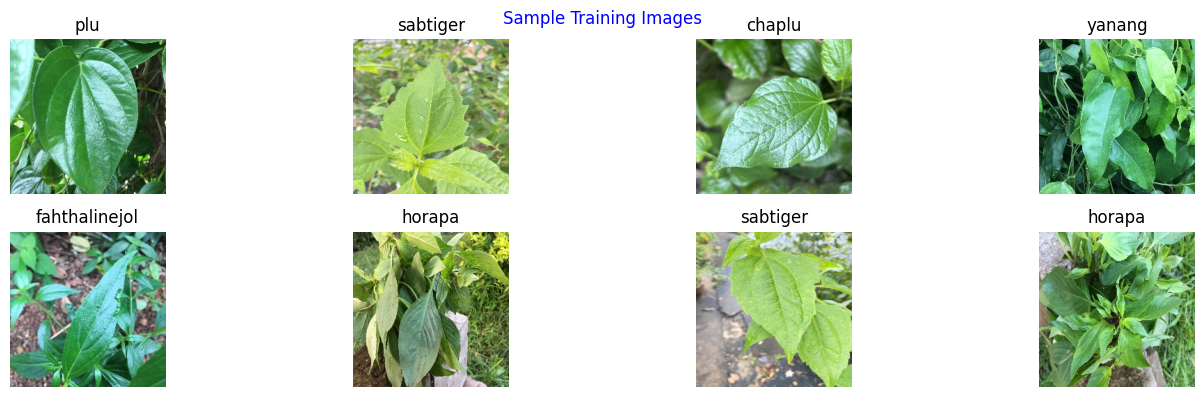

In [ ]:
labels = {value: key for key, value in train_set.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 4))
idx = 0

for i in range(2):
    for j in range(4):
        label = labels[np.argmax(train_set[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=12, color='blue')
plt.show()

# **ตรวจสอบจำนวนภาพ**

In [ ]:
ids, counts = np.unique(train_set.classes, return_counts=True)
ds = pd.Series(counts)

print('Training')
print(ds)

Training
0    160
1    160
2    160
3    160
4    160
5    160
6    160
7    160
8    160
9    160
dtype: int64


chaplu           160
fahthalinejol    160
horapa           160
krapao           160
lemon            160
magrud           160
plu              160
sabtiger         160
saranae          160
yanang           160
dtype: int64


<Axes: >

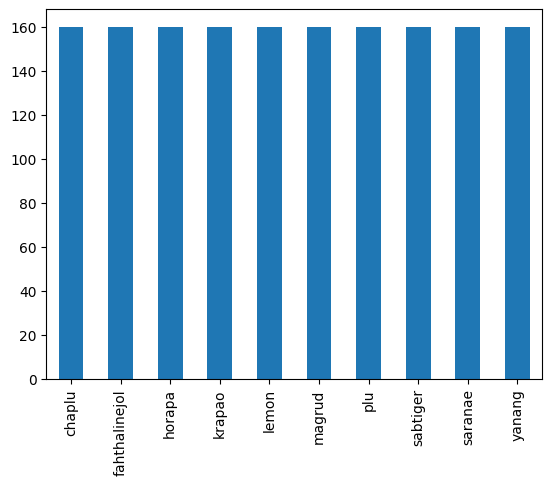

In [ ]:
labels = (train_set.class_indices)
labels = list(k for k,v in labels.items())

# for i in ids:
#     print('{:>6} = {}' . format(labels[i], counts[i]))

df = pd.Series(counts, index=labels)
print(df)
df.plot(kind = 'bar')

In [ ]:
ids, counts = np.unique(val_set.classes, return_counts=True)
ds = pd.Series(counts)

print('Training')
print(ds)

Training
0    40
1    40
2    40
3    40
4    40
5    40
6    40
7    40
8    40
9    40
dtype: int64


chaplu           40
fahthalinejol    40
horapa           40
krapao           40
lemon            40
magrud           40
plu              40
sabtiger         40
saranae          40
yanang           40
dtype: int64


<Axes: >

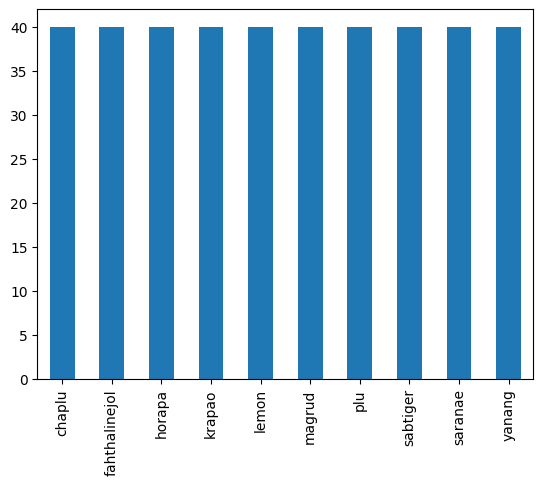

In [ ]:
labels = (train_set.class_indices)
labels = list(k for k,v in labels.items())

# for i in ids:
#     print('{:>6} = {}' . format(labels[i], counts[i]))

df = pd.Series(counts, index=labels)
print(df)
df.plot(kind = 'bar')

#แบ่งสัดส่วนข้อมูล

In [ ]:
_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

percentage = val_count/(train_count+val_count) * 100
print('Ratio Validation/Training set')

df = pd.Series(percentage)
df

Ratio Validation/Training set


,0
0,20.0
1,20.0
2,20.0
3,20.0
4,20.0
5,20.0
6,20.0
7,20.0
8,20.0
9,20.0


สรุปชุดข้อมูล

In [ ]:
class Dataset:
    def __init__(self, labels, train_ids, val_ids, test_ids, train_counts, val_counts, test_counts, total_data):
        self.labels = labels
        self.train_ids = train_ids
        self.val_ids = val_ids
        self.test_ids = test_ids
        self.train_counts = train_counts
        self.val_counts = val_counts
        self.test_counts = test_counts
        self.total_data = total_data

    def dataframe(self):
        data = {
            'class': self.labels,
            'train_quantity': self.train_counts,
            'val_quantity': self.val_counts,
            'test_quantity': self.test_counts,
            'train_%': (self.train_counts / self.total_data) * 100,
            'val_%': (self.val_counts / self.total_data) * 100,
            'test_%': (self.test_counts / self.total_data) * 100,
        }
        return pd.DataFrame(data)

In [ ]:
def get_dataset(train_set, val_set, test_set):
    labels = list(train_set.class_indices.keys())
    train_ids, train_counts = np.unique(train_set.classes, return_counts=True)
    val_ids, val_counts = np.unique(val_set.classes, return_counts=True)
    test_ids, test_counts = np.unique(test_set.classes, return_counts=True)

    total_data = sum(train_counts) + sum(val_counts) + sum(test_counts)

    dataset_obj = Dataset(labels, train_ids, val_ids, test_ids, train_counts, val_counts, test_counts, total_data=500)

    return dataset_obj

In [ ]:
dataset = get_dataset(train_set, val_set, test_set)
df = dataset.dataframe()

,class,train_quantity,val_quantity,test_quantity,train_%,val_%,test_%
0,chaplu,160,40,40,32.0,8.0,8.0
1,fahthalinejol,160,40,40,32.0,8.0,8.0
2,horapa,160,40,40,32.0,8.0,8.0
3,krapao,160,40,40,32.0,8.0,8.0
4,lemon,160,40,40,32.0,8.0,8.0
5,magrud,160,40,40,32.0,8.0,8.0
6,plu,160,40,40,32.0,8.0,8.0
7,sabtiger,160,40,40,32.0,8.0,8.0
8,saranae,160,40,40,32.0,8.0,8.0
9,yanang,160,40,40,32.0,8.0,8.0


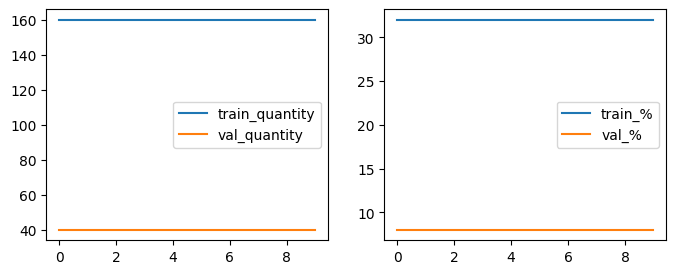

In [ ]:
def plot():
  fig, axes = plt.subplots(nrows=1, ncols=2,  figsize=(8, 3))

  df[["train_quantity", "val_quantity"]].plot(ax=axes[0])
  df[["train_%", "val_%"]].plot(ax=axes[1])

plot()
df

# **create model**

In [ ]:
input_tensor = Input(shape=(224, 224, 3))

In [ ]:
def create_model_MobileNet(in_shape, lr, num_classes):
    # โหลดโมเดล MobileNet โดยไม่รวมเลเยอร์สุดท้าย
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=in_shape)

    # ทำให้ base_model เป็น non-trainable
    base_model.trainable = False

    # สร้างอินพุต
    inputs = Input(shape=in_shape)

    # ใช้ base_model
    x = base_model(inputs, training=False)  # ใช้ MobileNet เป็นเลเยอร์พื้นฐาน
    x = GlobalAveragePooling2D()(x)  # ใช้ Global Average Pooling แทนการ Flatten
    x = Dense(512, activation='relu')(x)  # เลเยอร์ Dense
    #x = Dropout(0.1)(x) #เพิ่ม Dropout
    x = Dense(num_classes, activation='softmax')(x)  # เลเยอร์ Dense สำหรับการจำแนกประเภท

    # สร้างโมเดล
    model = Model(inputs=inputs, outputs=x)

    # คอมไพล์โมเดล
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

    return model

# สร้างโมเดล
model = create_model_MobileNet((224, 224, 3), 0.001, 10)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,758,794 (14.34 MB)

 Trainable params: 529,930 (2.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
num_classes = len(train_set.class_indices)
in_shape = (img_height, img_width, 3)
model = create_model_MobileNet(in_shape, learning_rate, num_classes)

In [ ]:
start = time.time()
history = model.fit(train_set,
                     validation_data=val_set,
                     epochs=EPOCH,
                     verbose=1)
end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/110


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1247s 38s/step - accuracy: 0.2185 - loss: 2.2146 - val_accuracy: 0.7400 - val_loss: 1.2038
Epoch 2/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 49s 368ms/step - accuracy: 0.8175 - loss: 0.9574 - val_accuracy: 0.9250 - val_loss: 0.6090
Epoch 3/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 342ms/step - accuracy: 0.9254 - loss: 0.4741 - val_accuracy: 0.9700 - val_loss: 0.3690
Epoch 4/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 340ms/step - accuracy: 0.9678 - loss: 0.2941 - val_accuracy: 0.9775 - val_loss: 0.2560
Epoch 5/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 371ms/step - accuracy: 0.9744 - loss: 0.2006 - val_accuracy: 0.9850 - val_loss: 0.1861
Epoch 6/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 340ms/step - accuracy: 0.9844 - loss: 0.1490 - val_accuracy: 0.9875 - val_loss: 0.1506
Epoch 7/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 335ms/step - accuracy: 0.9954 - loss: 0.1065 - val_accuracy: 0.9950 - val_loss: 0.1218
Epoch 8/110
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.9979 - loss: 0.0818 - val_accuracy

In [ ]:
# print("Train Loss: ", train_score[0])
# print("Train Accuracy: ", train_score[1])
# print('-' * 20)
# print("Validation Loss: ", valid_score[0])
# print("Validation Accuracy: ", valid_score[1])
# print('-' * 20)
# print("Test Loss: ", test_score[0])
# print("Test Accuracy: ", test_score[1])

In [ ]:
 test_loss, test_accuracy = model.evaluate(val_set, verbose=1)
 print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 1.0000 - loss: 0.0091
Test Loss: 0.008499915711581707
Test Accuracy: 1.0


## **กราฟ**

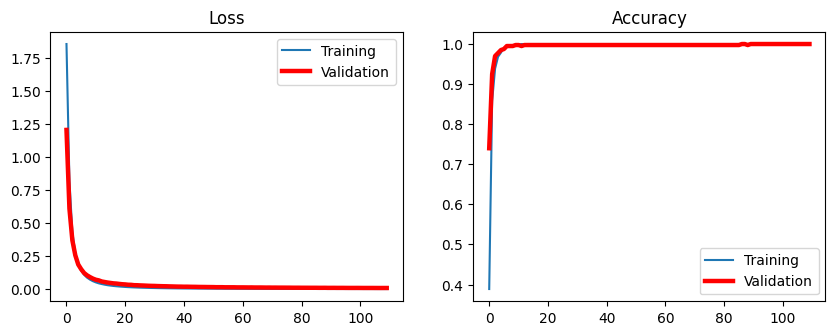

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

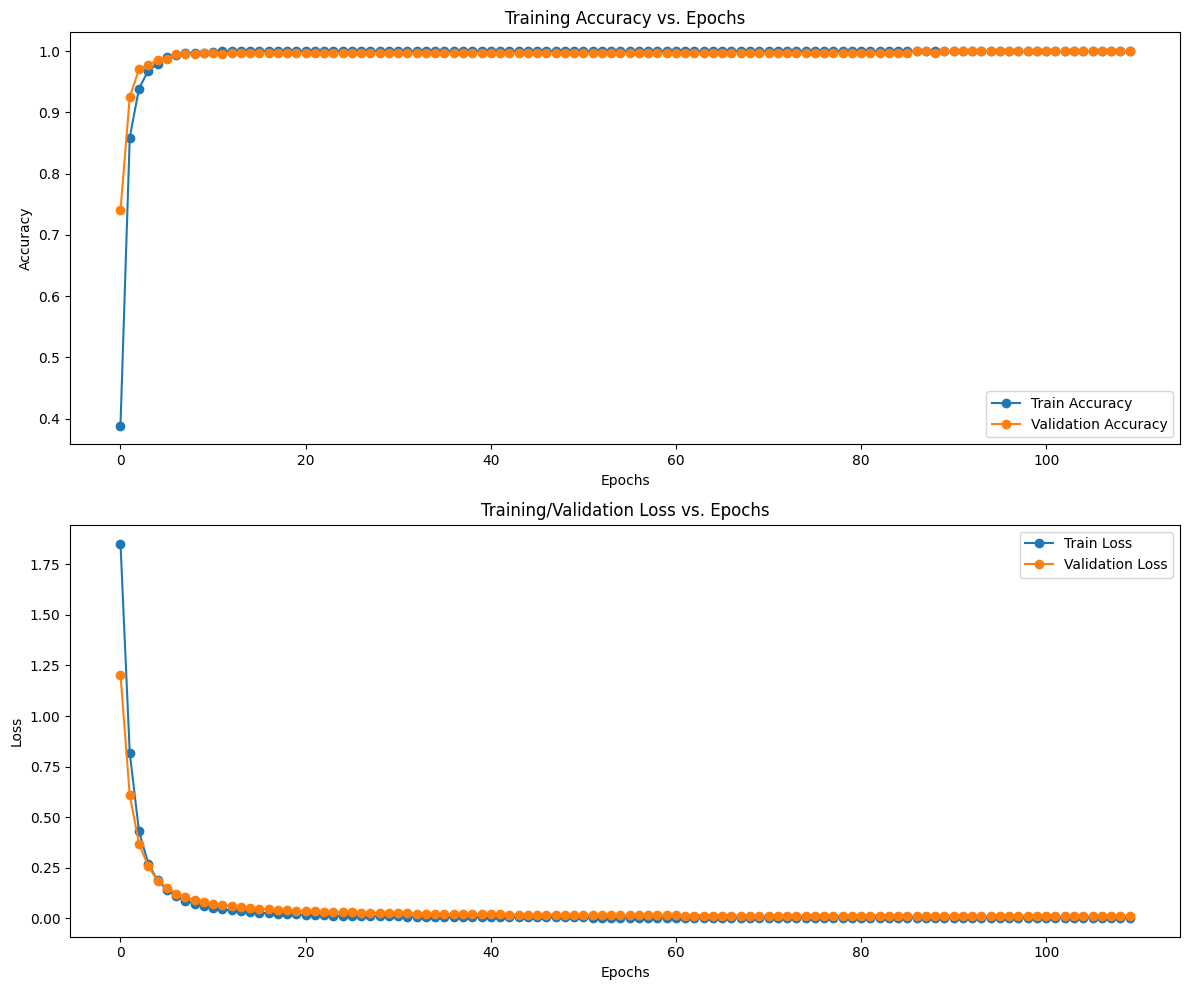

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# learning_rate = history.history['lr']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}' .format(acc[1]))

score = 1.000



# **ประเมินโมเดล**

In [ ]:
test_dataset ='/content/drive/MyDrive/My_Project/Thaiherb/test'

test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=32,
                                                 target_size = (224, 224),
                                                 class_mode='categorical')

Found 400 images belonging to 10 classes.


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 217ms/step


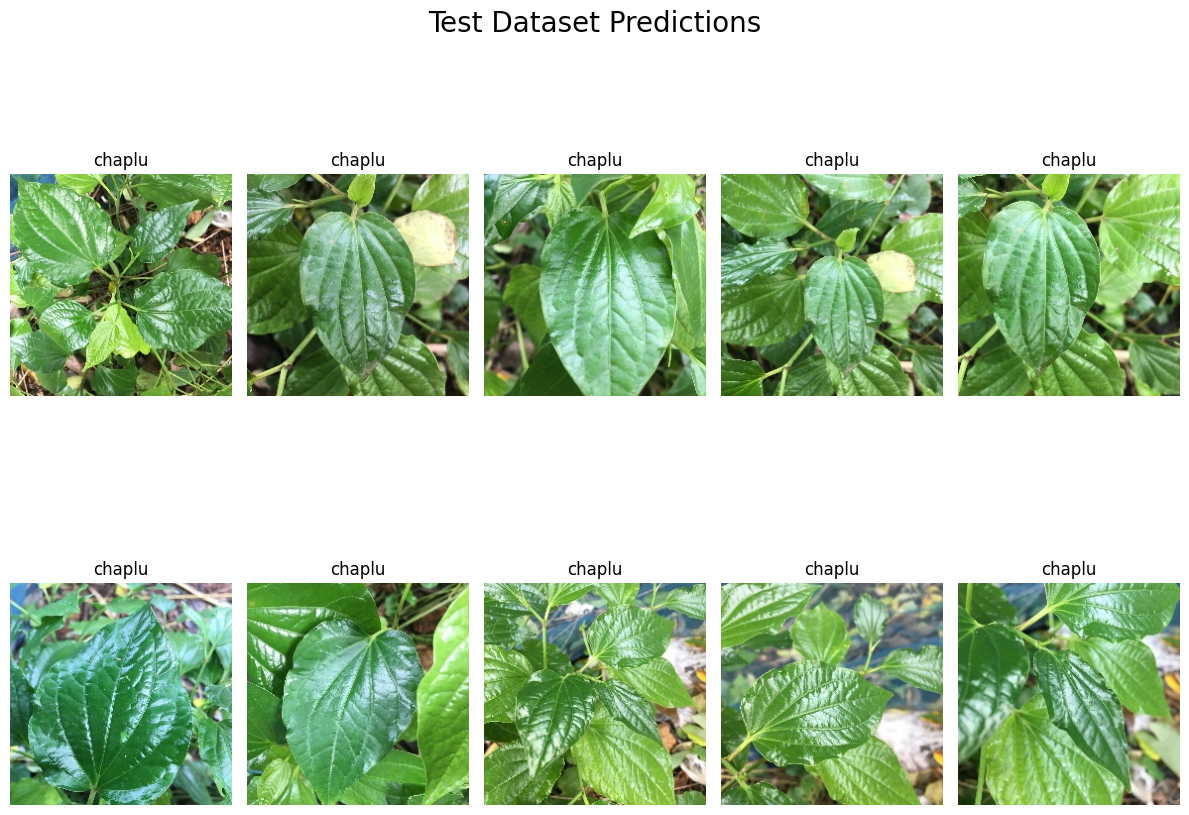

In [ ]:
# Predict using the test generator
predictions = model.predict(test_generator)

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])] # Now predictions contains numerical data
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=32)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 1.0000 - loss: 0.0045


In [ ]:
# print(f"Test Loss:     {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)
cf_mtx

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

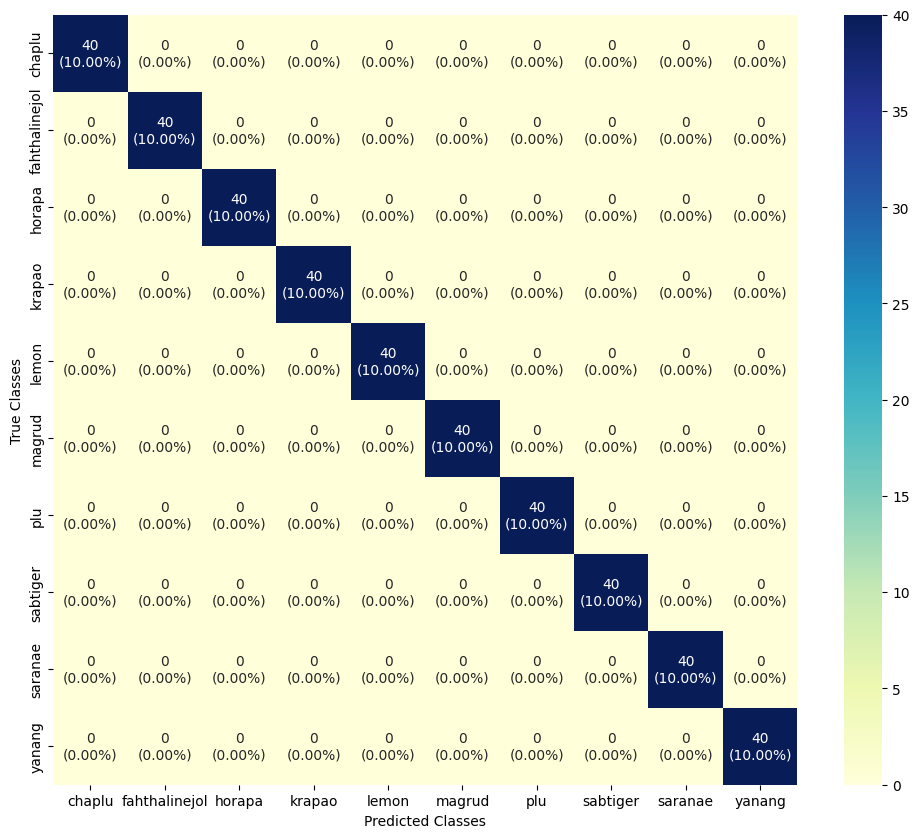

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(10, 10) # Reshape to 10x10 to match cf_mtx dimensions

# Assuming 'labels' should be a list of class names, define it here if not already defined
class_names = ['chaplu', 'fahthalinejol', 'horapa', 'krapao', 'lemon', 'magrud', 'plu', 'sabtiger', 'saranae', 'yanang'] # Replace with your actual class names

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=class_names, yticklabels=class_names,
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        40
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00        40
           9       1.00      1.00      1.00        40

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
print(classification_report(y_true, y_pred, target_names=train_set.class_indices.keys()))


               precision    recall  f1-score   support

       chaplu       1.00      1.00      1.00        40
fahthalinejol       1.00      1.00      1.00        40
       horapa       1.00      1.00      1.00        40
       krapao       1.00      1.00      1.00        40
        lemon       1.00      1.00      1.00        40
       magrud       1.00      1.00      1.00        40
          plu       1.00      1.00      1.00        40
     sabtiger       1.00      1.00      1.00        40
      saranae       1.00      1.00      1.00        40
       yanang       1.00      1.00      1.00        40

     accuracy                           1.00       400
    macro avg       1.00      1.00      1.00       400
 weighted avg       1.00      1.00      1.00       400



In [ ]:
errors = np.where(y_true != y_pred)[0]

# กำหนดค่า y_true_errors และ y_pred_errors
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

test_images = val_set.filenames
test_img = np.asarray(test_images)[errors]

# Check if there are any errors
if len(test_img) > 0:  # Proceed only if there are errors

    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 4))
    idx = 0

    for i in range(2):
        for j in range(5):
            idx = np.random.randint(0, len(test_img))
            true_index = y_true_errors[idx]
            true_label = labels[true_index]
            predicted_index = y_pred_errors[idx]
            predicted_label = labels[predicted_index]
            ax[i, j].set_title(f"True: {true_label} \n Predicted: {predicted_label}")
            img_path = os.path.join(val_dir, test_img[idx])
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax[i, j].imshow(img)

            ax[i, j].axis("off")

    plt.tight_layout()
    plt.figtext(0.5, 0.95, 'Wrong Predictions made on test set\n', ha='center', fontsize=15, color='red')

    plt.show()
else:
    print("No errors found.") # Print a message if no errors are found

No errors found.
